In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and prepare data.

In [83]:
relax = pd.read_csv("relax.csv", dtype={"Time": np.float64})
mpi = pd.read_csv("mpi.csv", dtype={"Time": np.float64})

In [84]:
# get average of repeated runs
relax_avg = relax.groupby("N").mean().reset_index()
mpi_avg = mpi.groupby(["N", "Cores"]).mean().reset_index()

# convert time from ms to s
relax_avg["Time"] = relax_avg.Time.div(1000)
mpi_avg["Time"] = mpi_avg.Time.div(1000)

# add row for total number of elements
fn = lambda x: (int)(x.N * x.N)
relax_avg["Size"] = relax_avg.apply(fn, axis=1)
mpi_avg["Size"] = mpi_avg.apply(fn, axis=1)

In [ ]:
# add row for flops
fn = lambda x: (9 * x.Iterations * x.N * x.N) / x.Time
relax_avg["FLOPS"] = relax_avg.apply(fn, axis=1)
mpi_avg["FLOPS"] = mpi_avg.apply(fn, axis=1)

# select only thousands
relax_small = relax_avg[relax_avg.N % 1000 == 0]
mpi_small = mpi_avg[mpi_avg.N % 1000 == 0]

## Combine data for easier processing.

In [91]:
# combine data
combined = pd.concat([relax_avg, mpi_avg])
combined = combined.fillna(0)
combined = combined.astype({"Cores": "int64"})

# add labels
fn = lambda x: "Sequential" if x.Cores == 0 else f"MPI {int(x.Cores)} cores"
combined["Label"] = combined.apply(fn, axis=1)

# select only thousands
combined_small = combined[combined.N % 1000 == 0]

---

## Plot performance.

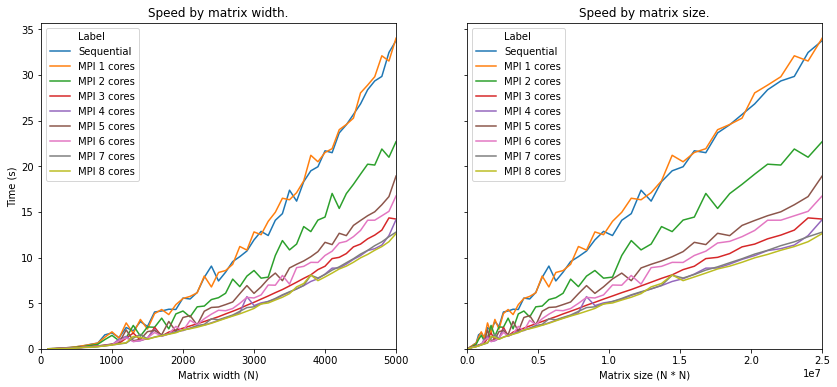

In [137]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(14, 6))

sns.lineplot(x="N", y="Time", hue="Label", data=combined, ax=axs[0])
sns.lineplot(x="Size", y="Time", hue="Label", data=combined, ax=axs[1])

axs[0].set_title("Speed by matrix width.")
axs[1].set_title("Speed by matrix size.")
axs[0].set_xlabel("Matrix width (N)")
axs[1].set_xlabel("Matrix size (N * N)")
axs[0].set_ylabel("Time (s)")

axs[0].set_xlim(0, 5000)
axs[1].set_xlim(0, 5000 * 5000)
axs[0].set_ylim(bottom=0)

plt.show()

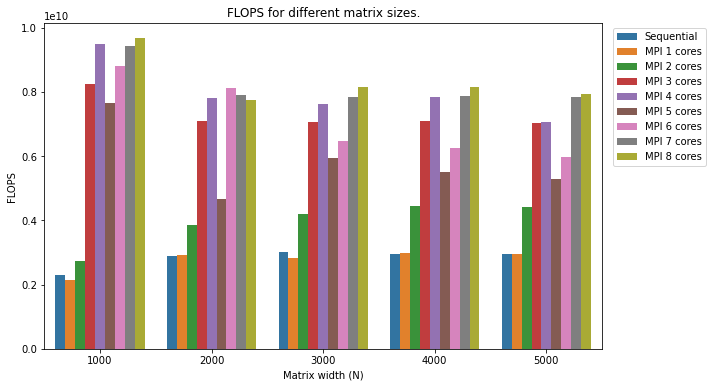

In [136]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x="N", hue="Label", y="FLOPS", data=combined_small)

ax.set_title("FLOPS for different matrix sizes.")
ax.set_xlabel("Matrix width (N)")
ax.set_ylabel("FLOPS")
ax.legend(bbox_to_anchor=(1.01, 1))

plt.show()

## Plot improvement.